# Categorical data visualization

In [12]:
# import libraries
import numpy as np
import pandas as pd

# We'll use following visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# To remove 'warnings' use 'filterwarnings'
import warnings
warnings.filterwarnings('ignore')

In [13]:
# shows figures in ipynb
%matplotlib inline

# ----  Exercise 1: part 1  ----

### ✅ 1. **Turn off edge color in bars**

* Set `edgecolor='none'`
* Or simply **omit the `edgecolor` parameter**

**Correct usage:**

```python
bars = plt.bar(city, sel, color=colors, edgecolor='none', linewidth=1)
```

Or omit entirely if not needed:

```python
bars = plt.bar(city, sel, color=colors)
```

---

### ✅ 2. **Increase space between bars**

You can increase spacing between bars in one of the following ways:

#### Option A: **Use `width` parameter** (most common)

Decrease the width of each bar to create more space between them.

```python
bars = plt.bar(city, sel, color=colors, width=0.6)  # default is 0.8
```

#### Option B: **Manually adjust bar positions**

If `city` is a list of categories, you can convert them to positions and shift them:

```python
import numpy as np

x = np.arange(len(city))  # numerical positions
spacing = 1.2  # increase spacing by multiplying
x_spaced = x * spacing

bars = plt.bar(x_spaced, sel, color=colors, width=0.8)
plt.xticks(x_spaced, city)  # set custom ticks
```


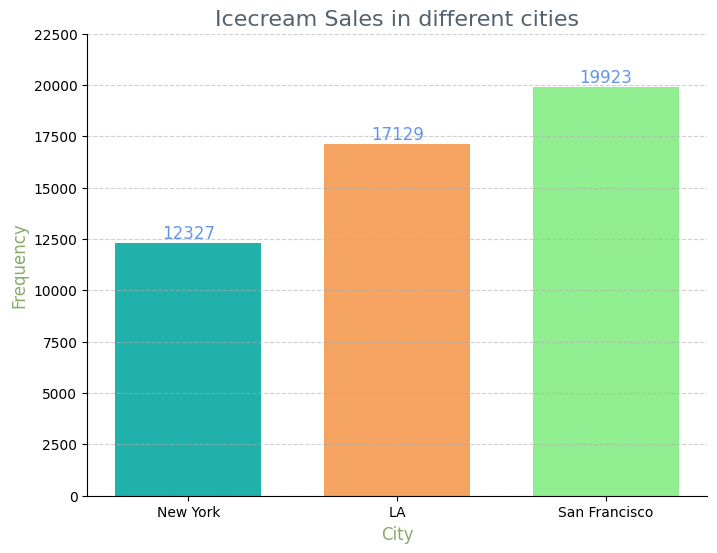

In [10]:
import matplotlib.pyplot as plt

# Data
city = ["New York", "LA", "San Francisco"]
sel = [12327, 17129, 19923]
colors = ["#20b2aa", "#f4a460", "#90ee90"]  # Blue, Orange, Green

# Create the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(city, sel, color=colors, edgecolor='none', width=0.7)

# Add labels and title
plt.xlabel("City", fontsize=12, color="#87a96b")
plt.ylabel("Frequency", fontsize=12, color="#87a96b")
plt.title("Icecream Sales in different cities", fontsize=16, color="#54626f")

# Display values on top of bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 20, 
             str(bar.get_height()), ha="center", va="bottom", fontsize=12, color='#6495ed')

# show grids
plt.grid(axis='y', linestyle="--", alpha=0.6)  # Enables grid with dashed lines and transparency
plt.ylim(0, 22500)  # Adjust the Y-axis


# Remove top and right spines
ax = plt.gca()  # get current Axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the chart
plt.show()

# ----  Exercise 1: part 2  ----

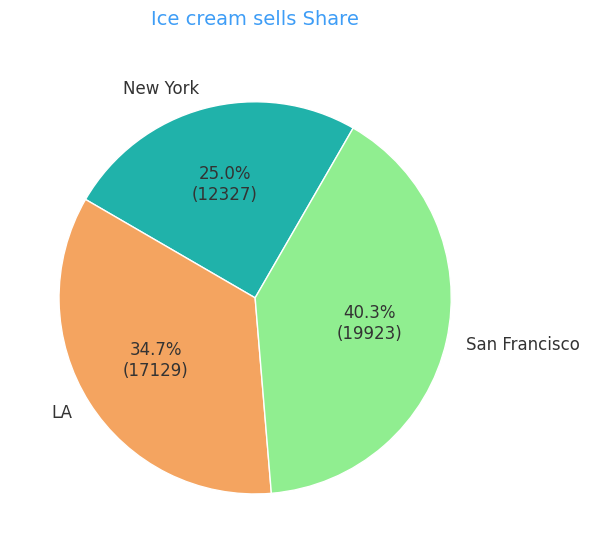

In [4]:
import matplotlib.pyplot as plt

# Data
city = ["New York", "LA", "San Francisco"]
sel = [12327, 17129, 19923]
colors = ["#20b2aa", "#f4a460", "#90ee90"]  # Blue, Orange, Green


# Custom label formatter using `sel`
def format_label(pct, all_vals=sel):
    total = sum(all_vals)
    absolute = int(round(pct / 100 * total))
    return f"{pct:.1f}%\n({absolute})"


# Create pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    sel,
    labels=city,
    colors=colors,
    startangle=60,
    wedgeprops={"edgecolor": "white", "linewidth": 1},
    textprops={"fontsize": 12, "color": "#333"},  # <--- set label color here
    autopct=lambda pct: format_label(pct, sel)
)


# Minimalist styling
plt.title("Ice cream sells Share", fontsize=14, color="#3e9df6", pad=20)
plt.tight_layout()
plt.show()

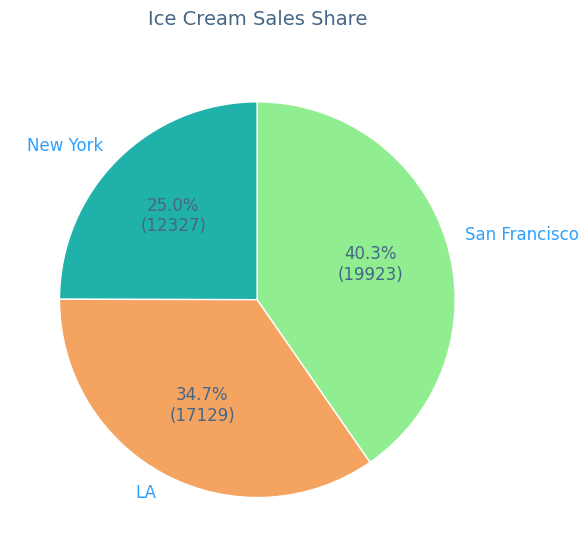

In [11]:
import matplotlib.pyplot as plt

# Data
city = ["New York", "LA", "San Francisco"]
sel = [12327, 17129, 19923]
colors = ["#20b2aa", "#f4a460", "#90ee90"]  # Blue, Orange, Green

# Custom label formatter using `sel`
def format_label(pct, all_vals=sel):
    total = sum(all_vals)
    absolute = int(round(pct / 100 * total))
    return f"{pct:.1f}%\n({absolute})"

# Create pie chart
fig, ax = plt.subplots(figsize=(6, 6))

wedges, label_texts, autopct_texts = ax.pie(
    sel,
    labels=city,
    colors=colors,
    startangle=90,
    wedgeprops={"edgecolor": "white", "linewidth": 1},
    textprops={"fontsize": 12},  # Use default; override below
    autopct=lambda pct: format_label(pct, sel)
)

# Set label colors (city names)
for label in label_texts:
    label.set_color("#2ea0fc")  # deep blue

# Set autopct (percentage + count) colors
for pct in autopct_texts:
    pct.set_color("#456685")  # terracotta

# Title and layout
ax.set_title("Ice Cream Sales Share", fontsize=14, color="#456685", pad=20)
plt.tight_layout()
plt.show()



### 🔍 **Why use this?**

```python
absolute = int(round(pct / 100 * total))
```

We're calculating the **absolute frequency** (e.g., sales count) from the **percentage (`pct`)** and the **total sum of all values**.

Because:

* The `autopct` function in `plt.pie()` only gives us the `pct` argument (e.g., `33.3%`).
* It does **not** give us the index (e.g., to look up `sel[0]`, `sel[1]`, etc.).
* So we **recalculate** the absolute value from the percentage:

  $$
  \text{absolute} = \frac{\text{percent}}{100} \times \text{sum of all values}
  $$

---

### 🧠 But why not use the `sel` list directly?

Because **`matplotlib.pie()` does not pass the index** of the slice being drawn to the `autopct` function. So **you can’t directly say “this is sel\[0]”** unless you rewrite the pie chart manually.

---

### ✅ Alternative (Advanced): Use a loop with manual labeling

If you **want full control**, you can skip `autopct` and manually add labels using `ax.text()` — and then you **can access the original values directly**.

# Pareto diagram

# ----  Exercise 1: part 3  ----

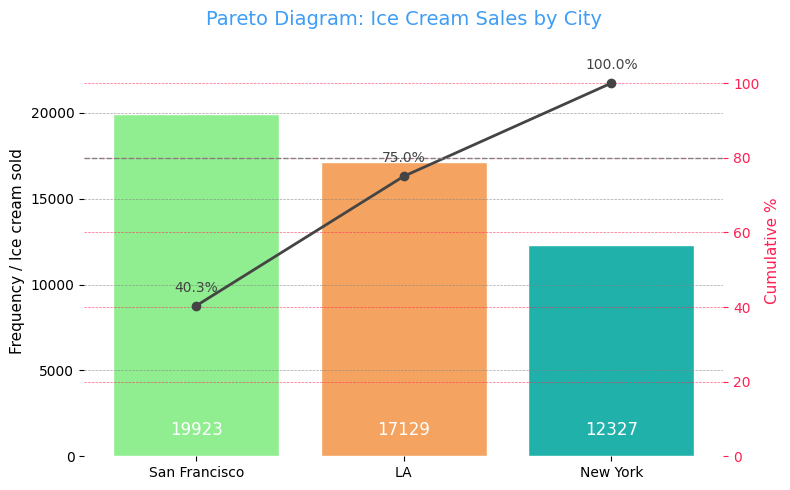

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Data
city = ["New York", "LA", "San Francisco"]
sel = [12327, 17129, 19923]
colors = ["#20b2aa", "#f4a460", "#90ee90"]  # Same colors as pie chart

# Sort data in descending order for Pareto
sorted_indices = np.argsort(sel)[::-1]
sorted_city = [city[i] for i in sorted_indices]
sorted_sel = [sel[i] for i in sorted_indices]
sorted_colors = [colors[i] for i in sorted_indices]

# Cumulative percentage
cumulative = np.cumsum(sorted_sel)
cumulative_percent = cumulative / sum(sorted_sel) * 100

# Plot
fig, ax1 = plt.subplots(figsize=(8, 5))

# Bar chart (absolute frequency)
bars = ax1.bar(sorted_city, sorted_sel, color=sorted_colors, edgecolor="white")
ax1.set_ylabel("Frequency / Ice cream sold", fontsize=11)
ax1.set_ylim(0, max(sorted_sel) * 1.2)
ax1.set_title("Pareto Diagram: Ice Cream Sales by City", fontsize=14, color="#3e9df6", pad=15)

# Grid and styling
ax1.grid(axis="y", linestyle="--", linewidth=0.5, alpha=0.7)
for spine in ax1.spines.values():
    spine.set_visible(False)


# Display values bottom of bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, 1000, 
             str(bar.get_height()), ha="center", va="bottom", fontsize=12, color='#fff')

# for bar in bars:
#     height = bar.get_height()
#     ax1.text(bar.get_x() + bar.get_width() / 2, height + 1000,  # <-- move label upward
#              str(height), ha="center", va="bottom", fontsize=12, color='#444')



# Line chart (cumulative %)
ax2 = ax1.twinx()
ax2.plot(sorted_city, cumulative_percent, color="#444", marker="o", linewidth=2)
ax2.set_ylabel("Cumulative %", fontsize=11, color='#ff2052')
ax2.set_ylim(0, 110)
ax2.tick_params(axis='y', colors='#ff2052')

# Add horizontal line at 80%
ax2.axhline(80, color="gray", linestyle="--", linewidth=1)

# Add data labels
for i, val in enumerate(cumulative_percent):
    ax2.text(i, val + 3, f"{val:.1f}%", ha='center', va='bottom', fontsize=10, color="#444")


# Minimalist styling
for spine in ax1.spines.values():
    spine.set_visible(False)
for spine in ax2.spines.values():
    spine.set_visible(False)


# Add Y-axis grid to bar chart axis
ax1.grid(True, which='major', axis='y', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
ax2.grid(True, which='major', axis='y', linestyle='--', linewidth=0.5, color='#ff2052', alpha=0.7)


plt.tight_layout()
plt.show()


___
___
# Neumerical data visualization

# ----  Exercise 2  ----

In [10]:
import pandas as pd
import numpy as np

dataset = [8, 30, 30, 50, 86, 94, 102, 110, 169, 170, 176, 236, 240, 241, 242, 255, 262, 276, 279, 282]

max_val = max(dataset)
min_val = min(dataset)

intervals = 6
interval_width = (max_val - min_val) / intervals
interval_round = int(interval_width + 1)  # round UP

print("Exact Interval Width:", interval_width)
print("Rounded Interval Width:", interval_round)

# Create bins using rounded interval width
rounded_bins = list(range(min_val, max_val + interval_round, interval_round))
print(rounded_bins)

# Create bins using exact interval width
exact_bins = np.linspace(min_val, max_val, intervals + 1)
print(exact_bins)

Exact Interval Width: 45.666666666666664
Rounded Interval Width: 46
[8, 54, 100, 146, 192, 238, 284]
[  8.          53.66666667  99.33333333 145.         190.66666667
 236.33333333 282.        ]


In [32]:
import pandas as pd

dataset = [8, 30, 30, 50, 86, 94, 102, 110, 169, 170, 176, 236, 240, 241, 242, 255, 262, 276, 279, 282]

min_val = min(dataset)
max_val = max(dataset)

intervals = 6
interval_width_rounded = int((max_val - min_val) / intervals + 1)  # round UP

# Create intervals manually
intervals_list = []
start = min_val
for _ in range(intervals):
    end = start + interval_width_rounded
    intervals_list.append((start, end))
    start = end

# Count frequencies
abs_freq = []
for start, end in intervals_list:
    count = sum(start <= x < end for x in dataset)
    abs_freq.append(count)

total = len(dataset)
rel_freq = [round(f / total, 3) for f in abs_freq]

# Build DataFrame with correct interval formatting
interval_formatted = [
    f"[{a}–{b})" if i < len(intervals_list) - 1 else f"[{a}–{b}]"
    for i, (a, b) in enumerate(intervals_list)
]

freq_table_rounded = pd.DataFrame({
    "Interval": interval_formatted,
    "Absolute Frequency": abs_freq,
    "Relative Frequency": rel_freq
})


print("Frequency Table (Rounded Width):")
print(freq_table_rounded)


print("\n\n")

# Print header with tabs
print("Interval\tAbsolute Frequency\tRelative Frequency")

# Loop through rows in the table
for i in range(len(freq_table_rounded)):
    row = freq_table_rounded.iloc[i]
    print(f"{row['Interval']}\t{row['Absolute Frequency']}\t{row['Relative Frequency']}")

print("\n")

print(f"Total: {np.sum(freq_table_rounded['Absolute Frequency'])}, rel_frq: {np.sum(freq_table_rounded['Relative Frequency'])}")

Frequency Table (Rounded Width):
    Interval  Absolute Frequency  Relative Frequency
0     [8–54)                   4                0.20
1   [54–100)                   2                0.10
2  [100–146)                   2                0.10
3  [146–192)                   3                0.15
4  [192–238)                   1                0.05
5  [238–284]                   8                0.40



Interval	Absolute Frequency	Relative Frequency
[8–54)	4	0.2
[54–100)	2	0.1
[100–146)	2	0.1
[146–192)	3	0.15
[192–238)	1	0.05
[238–284]	8	0.4


Total: 20, rel_frq: 1.0


In [35]:
import pandas as pd
import numpy as np

dataset = [8, 30, 30, 50, 86, 94, 102, 110, 169, 170, 176, 236, 240, 241, 242, 255, 262, 276, 279, 282]
max_val = max(dataset)
min_val = min(dataset)
total = len(dataset)
intervals = 6

interval_width_exact = (max_val - min_val) / intervals

# Create intervals manually
intervals_list_exact = []
start = min_val
for i in range(intervals):
    end = start + interval_width_exact
    # Round for cleaner display (optional)
    intervals_list_exact.append((start, end))
    start = end

# Count frequencies
abs_freq_exact = []
for i, (start, end) in enumerate(intervals_list_exact):
    if i < intervals - 1:
        count = sum(start <= x < end for x in dataset)
    else:
        count = sum(start <= x <= end for x in dataset)  # include max in last interval
    abs_freq_exact.append(count)

rel_freq_exact = [round(f / total, 3) for f in abs_freq_exact]

# Format intervals: last interval uses ]
interval_formatted = [
    f"[{a:.2f}–{b:.2f})" if i < intervals - 1 else f"[{a:.2f}–{b:.2f}]"
    for i, (a, b) in enumerate(intervals_list_exact)
]

# Build DataFrame
freq_table_exact = pd.DataFrame({
    "Interval": interval_formatted,
    "Absolute Frequency": abs_freq_exact,
    "Relative Frequency": rel_freq_exact
})

# Output
print("\nFrequency Table (Exact Width):")
print(freq_table_exact)

print("\n\nInterval\tAbsolute Frequency\tRelative Frequency")
for i in range(len(freq_table_exact)):
    row = freq_table_exact.iloc[i]
    print(f"{row['Interval']}\t{row['Absolute Frequency']}\t{row['Relative Frequency']}")

print("\nTotal:", sum(abs_freq_exact), ", rel_freq:", round(sum(rel_freq_exact), 3))



Frequency Table (Exact Width):
          Interval  Absolute Frequency  Relative Frequency
0     [8.00–53.67)                   4                0.20
1    [53.67–99.33)                   2                0.10
2   [99.33–145.00)                   2                0.10
3  [145.00–190.67)                   3                0.15
4  [190.67–236.33)                   1                0.05
5  [236.33–282.00]                   8                0.40


Interval	Absolute Frequency	Relative Frequency
[8.00–53.67)	4	0.2
[53.67–99.33)	2	0.1
[99.33–145.00)	2	0.1
[145.00–190.67)	3	0.15
[190.67–236.33)	1	0.05
[236.33–282.00]	8	0.4

Total: 20 , rel_freq: 1.0


# ----  Exercise 3  ----

In [4]:
import pandas as pd
import numpy as np

dataset_2 = [13, 68, 165, 193, 216, 228, 361, 470, 500, 529, 544, 602, 647, 692, 696, 699, 809, 892, 899, 936]

min_val = min(dataset_2)
max_val = max(dataset_2)

intervals = 10
interval_width_rounded = int((max_val - min_val) / intervals + 1)  # round UP

# Create intervals manually
intervals_list = []
start = min_val
bins = [min_val]
for _ in range(intervals):
    end = start + interval_width_rounded
    intervals_list.append((start, end))
    start = end
    bins.append(start)

# Count frequencies
abs_freq = []
for start, end in intervals_list:
    count = sum(start <= x < end for x in dataset_2)
    abs_freq.append(count)

total = len(dataset_2)
rel_freq = [round(f / total, 3) for f in abs_freq]

# Build DataFrame with correct interval formatting
interval_formatted = [
    f"[{a}–{b})" if i < len(intervals_list) - 1 else f"[{a}–{b}]"
    for i, (a, b) in enumerate(intervals_list)
]

freq_table_rounded = pd.DataFrame({
    "Interval": interval_formatted,
    "Absolute Frequency": abs_freq,
    "Relative Frequency": rel_freq
})


print("Frequency Table (Rounded Width):")
print(freq_table_rounded)


print("\n\n")

# Print header with tabs
print("Interval\tAbsolute Frequency\tRelative Frequency")

# Loop through rows in the table
for i in range(len(freq_table_rounded)):
    row = freq_table_rounded.iloc[i]
    print(f"{row['Interval']}\t{row['Absolute Frequency']}\t{row['Relative Frequency']}")

print("\n")

print(f"Total: {np.sum(freq_table_rounded['Absolute Frequency'])}, rel_frq: {np.sum(freq_table_rounded['Relative Frequency'])}")

Frequency Table (Rounded Width):
    Interval  Absolute Frequency  Relative Frequency
0   [13–106)                   2                0.10
1  [106–199)                   2                0.10
2  [199–292)                   2                0.10
3  [292–385)                   1                0.05
4  [385–478)                   1                0.05
5  [478–571)                   3                0.15
6  [571–664)                   2                0.10
7  [664–757)                   3                0.15
8  [757–850)                   1                0.05
9  [850–943]                   3                0.15



Interval	Absolute Frequency	Relative Frequency
[13–106)	2	0.1
[106–199)	2	0.1
[199–292)	2	0.1
[292–385)	1	0.05
[385–478)	1	0.05
[478–571)	3	0.15
[571–664)	2	0.1
[664–757)	3	0.15
[757–850)	1	0.05
[850–943]	3	0.15


Total: 20, rel_frq: 1.0


In [5]:
bins

[13, 106, 199, 292, 385, 478, 571, 664, 757, 850, 943]

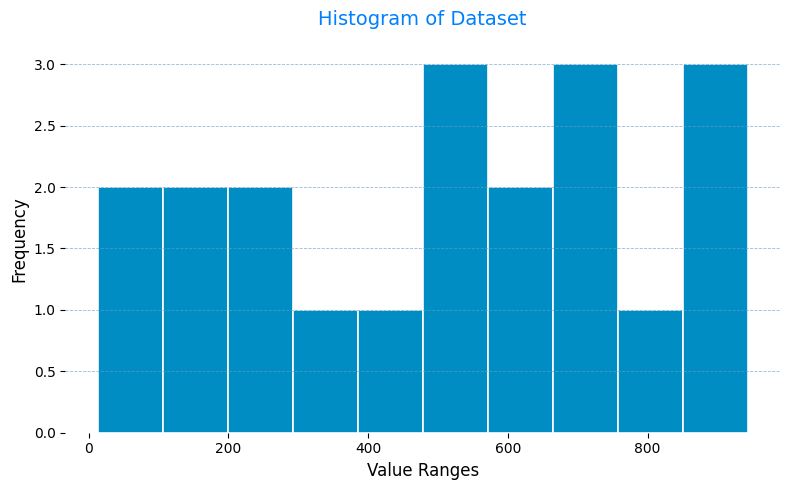

In [8]:
# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.hist(dataset_2, bins=bins, color="#008dc4", edgecolor="white", linewidth=1.2, rwidth=1.0)

# Labels and title
plt.xlabel("Value Ranges", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Histogram of Dataset", fontsize=14, color="#007fff", pad=15)

# Gridlines
plt.grid(axis='y', linestyle='--', linewidth=0.6, alpha=0.7, color="#6d9bc3")

# Minimalist styling
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.show()

___
___
# Cross Tables and Scatter Plots

In [1]:
import pandas as pd

# Step 1: Define the data
# (Student ID, Reading, Writing)
data = [(1, 273,216),
(2, 292,282),
(3, 219,250),
(4, 241,217),
(5, 284,266),
(6, 247,294),
(7, 237,215),
(8, 286,203),
(9, 237,286),
(10, 266,263),
(11, 311,270),
(12, 324,211),
(13, 330,243),
(14, 331,275),
(15, 336,367),
(16, 344,378),
(17, 346,315),
(18, 346,208),
(19, 356,451),
(20, 364,346),
(21, 365,435),
(22, 365,579),
(23, 369,390),
(24, 436,589),
(25, 393,365),
(26, 394,480),
(27, 417,499),
(28, 438,414),
(29, 398,530),
(30, 409,366),
(31, 437,453),
(32, 442,396),
(33, 442,531),
(34, 408,453),
(35, 387,444),
(36, 418,597),
(37, 461,407),
(38, 457,589),
(39, 371,489),
(40, 383,349),
(41, 372,584),
(42, 463,446),
(43, 452,451),
(44, 550,300),
(45, 529,480),
(46, 578,580),
(47, 454,457),
(48, 522,525),
(49, 554,483),
(50, 591,470),
(51, 601,585),
(52, 610,406),
(53, 611,503),
(54, 613,516),
(55, 614,639),
(56, 619,546),
(57, 634,556),
(58, 646,599),
(59, 668,534),
(60, 673,526),
(61, 696,613),
(62, 704,536),
(63, 705,578),
(64, 705,608),
(65, 708,717),
(66, 713,718),
(67, 713,719),
(68, 727,720),
(69, 735,724),
(70, 763,734),
(71, 776,735),
(72, 777,736),
(73, 785,738),
(74, 785,740),
(75, 547,476),
(76, 507,452),
(77, 474,451),
(78, 536,503),
(79, 455,499),
(80, 470,509),
(81, 536,540),
(82, 522,496),
(83, 462,507),
(84, 467,457),
(85, 477,549),
(86, 505,519),
(87, 515,491),
(88, 450,487),
(89, 542,455),
(90, 509,546),
(91, 455,514),
(92, 524,533),
(93, 451,536),
(94, 505,503),
(95, 465,507),
(96, 525,489),
(97, 508,488),
(98, 511,520),
(99, 469,527),
(100, 457,521),
(101, 499,462),
(102, 528,536),
(103, 539,549),
(104, 549,521)]


# Step 2: Create DataFrame
df = pd.DataFrame(data, columns=["Student ID", "Reading", "Writing"])

# Step 3: Save to CSV
df.to_csv("SAT_scores.csv", index=False)

# Step 4: Load back from CSV
loaded_df = pd.read_csv("SAT_scores.csv")

print(loaded_df)


     Student ID  Reading  Writing
0             1      273      216
1             2      292      282
2             3      219      250
3             4      241      217
4             5      284      266
..          ...      ...      ...
99          100      457      521
100         101      499      462
101         102      528      536
102         103      539      549
103         104      549      521

[104 rows x 3 columns]


# ----  Example 4: part 1 (cross table)  ----

In [4]:
import pandas as pd

data = [
    "60% of 18 to 25-year-olds are employed",
    "85% of 25 to 35-year-olds are employed",
    "5% of 35 to 45-year-olds are unemployed",
    "3% of 45 to 55-year-olds are unemployed",
    "3% of 55 to 65-year-olds are unemployed",
    "All 65+ are employed."
]

# Initialize table
age_groups = []
employed = []
unemployed = []

# Parse data
for sentence in data:
    sentence = sentence.lower()
    
    if "all" in sentence:
        age_group = "65+"
        emp = 100
        unemp = 0
    else:
        percent = int(sentence.split("%")[0])
        age_group = sentence.split("of ")[1].split(" are")[0].split("-")[0].replace(" to ", '-')
        if "unemployed" in sentence:
            emp = 100 - percent
            unemp = percent
        else:
            emp = percent
            unemp = 100 - percent

    age_groups.append(age_group)
    employed.append(emp)
    unemployed.append(unemp)

# Create cross table
df = pd.DataFrame({
    "Age Group": age_groups,
    "Employed (%)": employed,
    "Unemployed (%)": unemployed
})

# Print tab-separated table
print("Age Group\tEmployed (%)\tUnemployed (%)\tTotal")
emp_total = 0
unemp_toyal = 0
pct_total = 0
for i in range(len(df)):
    row = df.iloc[i]
    print(f"{row['Age Group']}\t{row['Employed (%)']}\t{row['Unemployed (%)']}\t{row['Employed (%)']+row['Unemployed (%)']}")
    emp_total += row['Employed (%)']
    unemp_toyal += row['Unemployed (%)']
    pct_total += (row['Employed (%)']+row['Unemployed (%)'])

print(f"Total\t{emp_total}\t{unemp_toyal}\t{pct_total}")


Age Group	Employed (%)	Unemployed (%)	Total
18-25	60	40	100
25-35	85	15	100
35-45	95	5	100
45-55	97	3	100
55-65	97	3	100
65+	100	0	100
Total	534	66	600


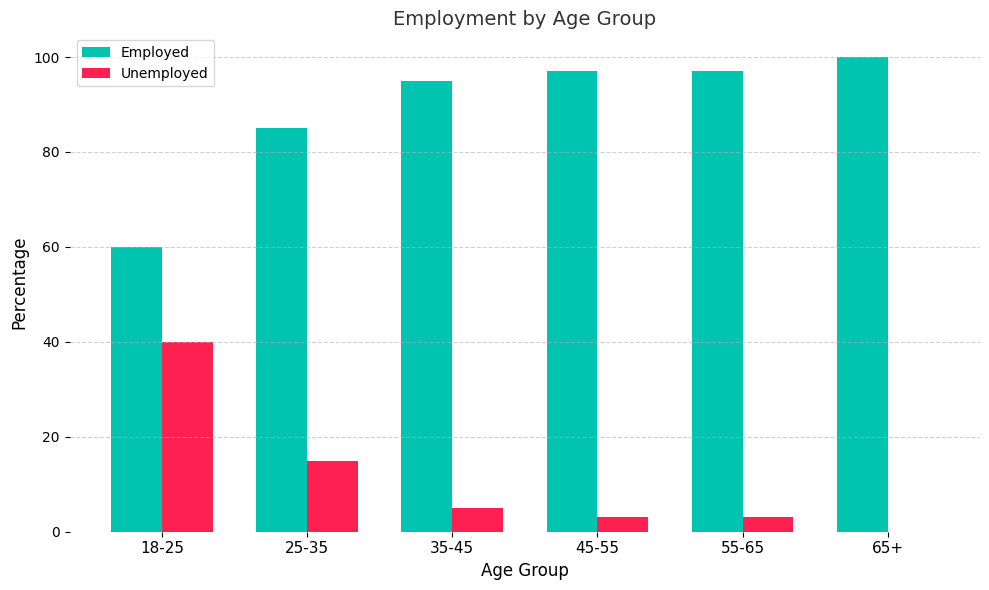

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Use data from DataFrame
age_groups = df["Age Group"]
employed = df["Employed (%)"]
unemployed = df["Unemployed (%)"]

x = np.arange(len(age_groups))
bar_width = 0.35

# Plot
plt.figure(figsize=(10, 6))
plt.bar(x - bar_width/2, employed, width=bar_width, label="Employed", color="#00c4b0")
plt.bar(x + bar_width/2, unemployed, width=bar_width, label="Unemployed", color="#ff2052")

# Styling
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Percentage", fontsize=12)
plt.title("Employment by Age Group", fontsize=14, color="#333")
plt.xticks(x, age_groups, fontsize=11)
plt.yticks(fontsize=10)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Minimalist frame
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.tight_layout()


# ----  Example 4: part 2 (scater plot)  ----

To convert this kind of **tab-separated data** (copied from a Word table or any tab-aligned plain text) into a **Pandas DataFrame**, you can use `pd.read_csv()` with `StringIO`.

Here's the complete Python code:

```python
import pandas as pd
from io import StringIO

data = """Date	Apple (AAPL)	Alphabet (GOOGL)	Bank of America (BAC)
03-01-17	116.15	808.01	22.53
04-01-17	116.02	807.77	22.95
05-01-17	116.61	813.02	22.68"""

# Convert tab-separated text to DataFrame
df = pd.read_csv(StringIO(data), sep="\t")

# Display the DataFrame
print(df)
```

### Output:

```
       Date  Apple (AAPL)  Alphabet (GOOGL)  Bank of America (BAC)
0  03-01-17         116.15            808.01                  22.53
1  04-01-17         116.02            807.77                  22.95
2  05-01-17         116.61            813.02                  22.68
```

This works seamlessly with data copied from Word if tabs are used as column separators. If spaces were used instead of tabs, replace `sep="\t"` with `sep="\s+"` and add `engine='python'`:

```python
df = pd.read_csv(StringIO(data), sep="\s+", engine='python')
```


In [1]:
# data prep
data = """Date	Apple (AAPL)	Alphabet (GOOGL)	Bank of America (BAC)
03-01-17	116.15	808.01	22.53
04-01-17	116.02	807.77	22.95
05-01-17	116.61	813.02	22.68
06-01-17	117.91	825.21	22.68
09-01-17	118.99	827.18	22.55
10-01-17	119.11	826.01	22.94
11-01-17	119.75	829.86	23.07
12-01-17	119.25	829.53	22.92
13-01-17	119.04	830.94	23.01
17-01-17	120	827.46	22.05
18-01-17	119.99	829.02	22.63
19-01-17	119.78	824.37	22.53
20-01-17	120	828.17	22.64
23-01-17	120.08	844.43	22.56
24-01-17	119.97	849.53	22.95
25-01-17	121.88	858.45	23.37
26-01-17	121.94	856.98	23.44
27-01-17	121.95	845.03	23.36
30-01-17	121.63	823.83	22.95
31-01-17	121.35	820.19	22.64
01-02-17	128.75	815.24	22.89
02-02-17	128.53	818.26	22.72
03-02-17	129.08	820.13	23.29
06-02-17	130.29	821.62	23.12
07-02-17	131.53	829.23	22.9
08-02-17	132.04	829.88	22.67
09-02-17	132.42	830.06	23.12
10-02-17	132.12	834.85	23.08
13-02-17	133.29	838.96	23.4
14-02-17	135.02	840.03	24.06
15-02-17	135.51	837.32	24.58
16-02-17	135.34	842.17	24.58
17-02-17	135.72	846.55	24.52
21-02-17	136.7	849.27	24.78
22-02-17	137.11	851.36	24.79
23-02-17	136.53	851	24.58
24-02-17	136.66	847.81	24.23
27-02-17	136.93	849.67	24.57
28-02-17	136.99	844.93	24.68
01-03-17	139.79	856.75	25.5
02-03-17	138.96	849.85	25.23
03-03-17	139.78	849.08	25.44
06-03-17	139.34	847.27	25.25
07-03-17	139.52	851.15	25.21
08-03-17	139	853.64	25.26
09-03-17	138.68	857.84	25.35
10-03-17	139.14	861.4	25.31
13-03-17	139.2	864.58	25.3
14-03-17	138.99	865.91	25.32
15-03-17	140.46	868.39	25.18
16-03-17	140.69	870	25.22
17-03-17	139.99	872.37	24.86
20-03-17	141.46	867.91	24.44
21-03-17	139.84	850.14	23.02
22-03-17	141.42	849.8	22.94
23-03-17	140.92	839.65	23.07
24-03-17	140.64	835.14	23.12
27-03-17	140.88	838.51	23.03
28-03-17	143.8	840.63	23.48
29-03-17	144.12	849.87	23.35
30-03-17	143.93	849.48	23.87
31-03-17	143.66	847.8	23.59
03-04-17	143.7	856.75	23.59
04-04-17	144.77	852.57	23.44
05-04-17	144.02	848.91	23.17
06-04-17	143.66	845.1	23.26
07-04-17	143.34	842.1	23.16
10-04-17	143.17	841.7	23.02
11-04-17	141.63	839.88	22.92
12-04-17	141.8	841.46	22.65
13-04-17	141.05	840.18	22.34
17-04-17	141.83	855.13	22.81
18-04-17	141.2	853.99	22.71
19-04-17	140.68	856.51	22.74
20-04-17	142.44	860.08	23.07
21-04-17	142.27	858.95	22.71
24-04-17	143.64	878.93	23.63
25-04-17	144.53	888.84	23.98
26-04-17	143.68	889.14	23.89
27-04-17	143.79	891.44	23.65
28-04-17	143.65	924.52	23.34
01-05-17	146.58	932.82	23.61
02-05-17	147.51	937.09	23.53
03-05-17	147.06	948.45	23.77
04-05-17	146.53	954.72	23.85
05-05-17	148.96	950.28	23.74
08-05-17	153.01	958.69	23.96
09-05-17	153.99	956.71	23.98
10-05-17	153.26	954.84	24.15
11-05-17	153.95	955.89	24.07
12-05-17	156.1	955.14	24
15-05-17	155.7	959.22	24.06
16-05-17	155.47	964.61	23.99
17-05-17	150.25	942.17	22.57
18-05-17	152.54	950.5	22.74
19-05-17	153.06	954.65	23.05
22-05-17	153.99	964.07	23.04
23-05-17	153.8	970.55	23.39
24-05-17	153.34	977.61	23.36
25-05-17	153.87	991.86	23.25
26-05-17	153.61	993.27	23.24
30-05-17	153.67	996.17	22.91
31-05-17	152.76	987.09	22.41
01-06-17	153.18	988.29	22.63
"""

In [2]:
import pandas as pd
# Importing the StringIO module.
from io import StringIO 

# Convert tab-separated text to DataFrame
df = pd.read_csv(StringIO(data), sep="\t")

# Display the DataFrame
print(df)

         Date  Apple (AAPL)  Alphabet (GOOGL)  Bank of America (BAC)
0    03-01-17        116.15            808.01                  22.53
1    04-01-17        116.02            807.77                  22.95
2    05-01-17        116.61            813.02                  22.68
3    06-01-17        117.91            825.21                  22.68
4    09-01-17        118.99            827.18                  22.55
..        ...           ...               ...                    ...
99   25-05-17        153.87            991.86                  23.25
100  26-05-17        153.61            993.27                  23.24
101  30-05-17        153.67            996.17                  22.91
102  31-05-17        152.76            987.09                  22.41
103  01-06-17        153.18            988.29                  22.63

[104 rows x 4 columns]


In [3]:
# Step 3: Save to CSV
df.to_csv("stock_APPL_GOOGL_BAC.csv", index=False)

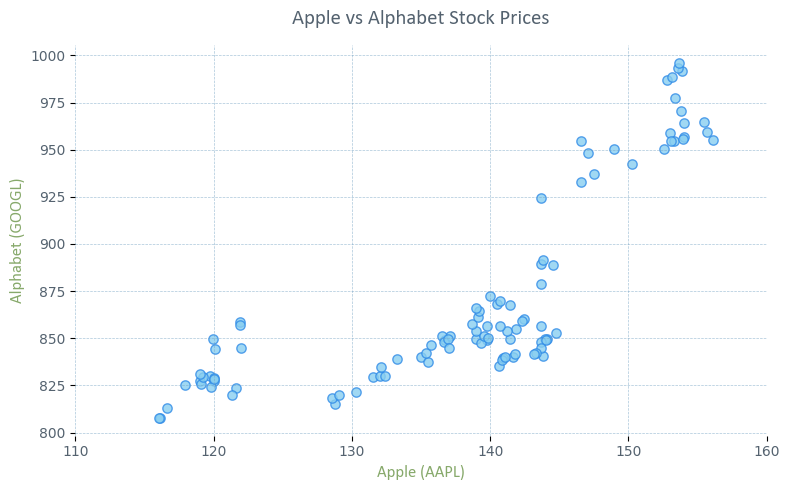

In [ ]:
# scatter plot
import matplotlib.pyplot as plt
fntNm = "Calibri"
# Task 1: Apple vs Alphabet
plt.figure(figsize=(8, 5))
plt.scatter(df["Apple (AAPL)"], df["Alphabet (GOOGL)"], 
            color="#89cff0", edgecolors='#318ce7', 
            s=45, alpha=0.8)

plt.xlim(110, 160)  # Set x-axis from 100 to 120
# plt.ylim(800, 820)  # Set y-axis from 800 to 820

plt.title("Apple vs Alphabet Stock Prices", fontsize=15, color="#54626f", pad=15, fontname=fntNm)
plt.xlabel("Apple (AAPL)", fontsize=12, color="#87a96b", fontname=fntNm)
plt.ylabel("Alphabet (GOOGL)", fontsize=12, color="#87a96b", fontname=fntNm)

plt.xticks(color="#54626f", fontsize=10)
plt.yticks(color="#54626f", fontsize=10)

plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.6, color="#72a0c1")

for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.tight_layout()
plt.show()


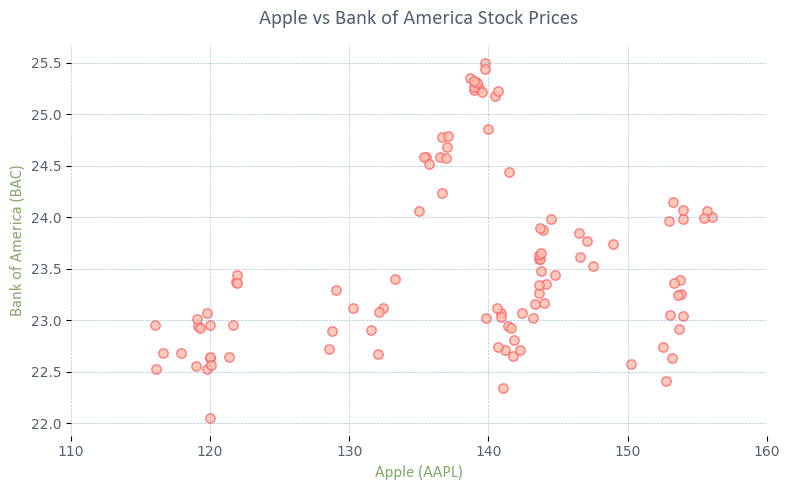

In [15]:
# Task 2: Apple vs Bank of America
plt.figure(figsize=(8, 5))
plt.scatter(df["Apple (AAPL)"], df["Bank of America (BAC)"], 
            color="#fcbfac", edgecolors="#ff6166", 
            s=45, alpha=0.8)

plt.title("Apple vs Bank of America Stock Prices", fontsize=15, color="#54626f", pad=15, fontname=fntNm)
plt.xlabel("Apple (AAPL)", fontsize=12, color="#87a96b", fontname=fntNm)
plt.ylabel("Bank of America (BAC)", fontsize=12, color="#87a96b", fontname=fntNm)

plt.xlim(110, 160)  # Set x-axis from 100 to 120
# plt.ylim(21, 26)  # Set y-axis from 800 to 820

plt.xticks(color="#54626f", fontsize=10)
plt.yticks(color="#54626f", fontsize=10)

plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.6, color="#72a0c1")

for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.show()

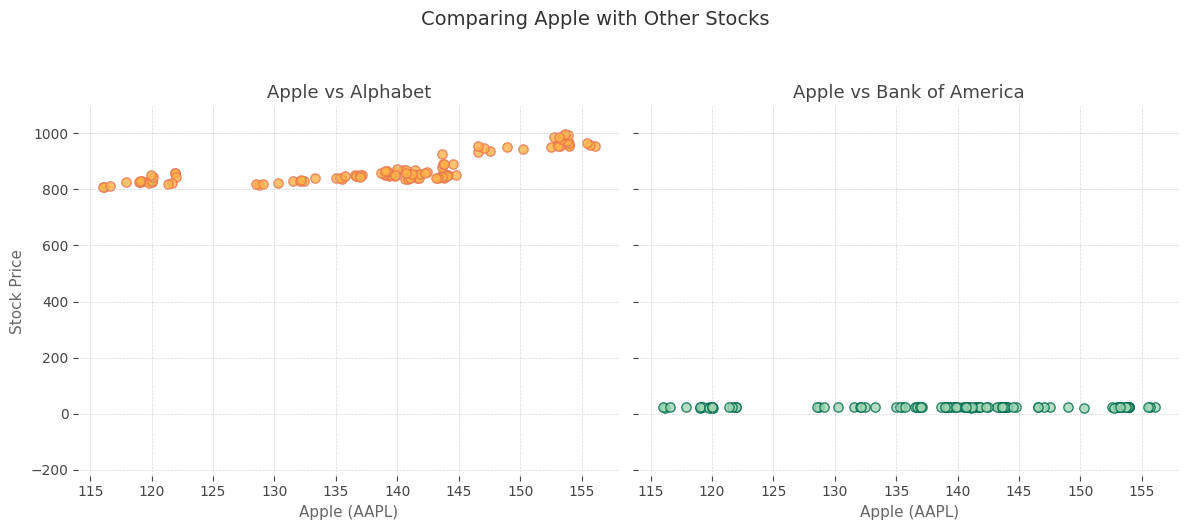

In [29]:
# comparison
import matplotlib.pyplot as plt

# Subplot setup
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)

# Subplot 1: Apple vs Alphabet
ax1.scatter(df["Apple (AAPL)"], df["Alphabet (GOOGL)"], 
            color="#ffb347", edgecolors="#e97451", s=45, alpha=0.8)
ax1.set_title("Apple vs Alphabet", fontsize=13, color="#444")
ax1.set_xlabel("Apple (AAPL)", fontsize=11, color="#666")
ax1.set_ylabel("Stock Price", fontsize=11, color="#666")
ax1.grid(True, linestyle="--", linewidth=0.5, alpha=0.6, color="#bbb")

# Subplot 2: Apple vs Bank of America
ax2.scatter(df["Apple (AAPL)"], df["Bank of America (BAC)"], 
            color="#a0d6b4", edgecolors="#006a4e", s=45, alpha=0.8)
ax2.set_title("Apple vs Bank of America", fontsize=13, color="#444")
ax2.set_xlabel("Apple (AAPL)", fontsize=11, color="#666")
ax2.grid(True, linestyle="--", linewidth=0.5, alpha=0.6, color="#bbb")

# Same y-limits for both subplots
plt.ylim(min(df[["Apple (AAPL)", "Bank of America (BAC)"]].min()) * -10,
         max(df[["Alphabet (GOOGL)", "Bank of America (BAC)"]].max()) * 1.1)

# Minimalist style
for ax in (ax1, ax2):
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.tick_params(colors="#444", labelsize=10)

plt.suptitle("Comparing Apple with Other Stocks", fontsize=14, color="#333", y=1.05)
plt.tight_layout()
plt.show()
